In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as pg

In [2]:
conn = pg.connect(
    host='localhost',
    database='phoenix',
    port=5432,
    user='postgres',
    password='adminphoenix'
)
cursor = conn.cursor()

In [3]:
churn = pd.read_sql_query("""SELECT * FROM churnbase""",
                          conn)
cursor.close()
conn.close()

C:\Users\User\AppData\Local\Temp\ipykernel_21344\4111480195.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  churn = pd.read_sql_query("""SELECT * FROM churnbase""",


# Análisis Inicial

## Info

In [4]:
churn.info(memory_usage='deep',
        show_counts=True,
        verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 167.7 MB


## Variables Numéricas

In [5]:
churn.describe(include='number')

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### Exploración Quantity <= 0

In [6]:
churn[churn['Quantity'] <= 0].sort_values(by='Quantity', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
540087,C581465,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,-1,2011-12-08 18:59:00,8.50,15755,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
540084,C581464,23458,DOLLY CABINET 3 DRAWERS,-1,2011-12-08 18:57:00,14.95,15951,United Kingdom
1446,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841,United Kingdom
...,...,...,...,...,...,...,...,...
4298,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
225589,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225588,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
61716,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


In [7]:
churn[churn['InvoiceNo'] == 'C536379']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom


In [8]:
churn[churn['CustomerID'] == '14527']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
8969,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
8970,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
8971,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
8972,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom
...,...,...,...,...,...,...,...,...
533818,581114,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-12-07 12:19:00,4.95,14527,United Kingdom
533819,581114,22835,HOT WATER BOTTLE I AM SO POORLY,2,2011-12-07 12:19:00,4.95,14527,United Kingdom
533820,581114,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2011-12-07 12:19:00,4.25,14527,United Kingdom
533821,581114,21479,WHITE SKULL HOT WATER BOTTLE,2,2011-12-07 12:19:00,4.25,14527,United Kingdom


### Exploración UnitPrice <= 0

In [9]:
churn[churn['UnitPrice'] <= 0].sort_values(by='UnitPrice', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
538923,581422,23169,smashed,-235,2011-12-08 15:24:00,0.00,NaN,United Kingdom
624,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1893,537009,84534B,NaN,-80,2010-12-03 15:38:00,0.00,NaN,United Kingdom
1976,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
1977,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
2030,536552,20950,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
1994,536550,85044,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
1993,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
299999,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [10]:
churn[churn['UnitPrice'] <= 0].value_counts(subset=['UnitPrice'])

UnitPrice
 0.00        2515
-11062.06       2
Name: count, dtype: int64

### Exploración Quantity Max

In [11]:
churn[churn['Quantity'].max() == churn['Quantity']].sort_values(by='Quantity', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540424,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


### Exploración Quantity Min

In [12]:
churn[churn['Quantity'].min() == churn['Quantity']].sort_values(by='Quantity', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540425,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


### Exploración UnitPrice Max

In [13]:
churn[churn['UnitPrice'].max() == churn['UnitPrice']].sort_values(by='UnitPrice', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222742,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom


## Variables Categóricas

In [14]:
for col in churn.columns:
    if churn[col].dtype == 'object':
        print(f"Column: {col}")
        print(f"Unique values: {churn[col].nunique()}")
        print(f"Missing values: {churn[col].isnull().sum()}")
        print("-" * 50)


Column: InvoiceNo
Unique values: 25900
Missing values: 0
--------------------------------------------------
Column: StockCode
Unique values: 4070
Missing values: 0
--------------------------------------------------
Column: Description
Unique values: 4224
Missing values: 0
--------------------------------------------------
Column: CustomerID
Unique values: 4373
Missing values: 0
--------------------------------------------------
Column: Country
Unique values: 38
Missing values: 0
--------------------------------------------------


### Exploración Description

In [15]:
churn[churn['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [16]:
churn[churn['Description'].isnull()].describe(include='number')

,Quantity,UnitPrice
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


### Exploración CustomerID

In [17]:
churn[churn['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [18]:
churn[churn['CustomerID'].isnull()].describe(include='number')

,Quantity,UnitPrice
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [19]:
churn[churn['InvoiceNo'] == '536544']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1448,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1450,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1451,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1452,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1971,536544,21721,CANDY SHOP STICKER SHEET,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1972,536544,21722,SWEET PUDDING STICKER SHEET,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1973,536544,21731,RED TOADSTOOL LED NIGHT LIGHT,5,2010-12-01 14:32:00,3.36,NaN,United Kingdom
1974,536544,21742,LARGE ROUND WICKER PLATTER,1,2010-12-01 14:32:00,12.72,NaN,United Kingdom


### Exploración StockCode

In [20]:
churn[churn['StockCode'].str.match(r'^[A-Za-z]', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
387,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands
1126,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany
1428,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911,EIRE
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526,Germany


In [21]:
churn[churn['StockCode'].str.match(r'^[A-Za-z]', na=False)]['Description'].value_counts()

Description
POSTAGE                                1252
DOTCOM POSTAGE                          709
Manual                                  572
CARRIAGE                                143
Discount                                 77
SAMPLES                                  63
Bank Charges                             37
AMAZON FEE                               34
CRUK Commission                          16
NaN                                      15
GIRLS PARTY BAG                          13
BOYS PARTY BAG                           11
Dotcomgiftshop Gift Voucher £20.00        9
Dotcomgiftshop Gift Voucher £10.00        8
Dotcomgiftshop Gift Voucher £30.00        7
ebay                                      5
PADS TO MATCH ALL CUSHIONS                4
BOXED GLASS ASHTRAY                       4
Dotcomgiftshop Gift Voucher £50.00        4
Dotcomgiftshop Gift Voucher £40.00        3
Adjust bad debt                           3
SUNJAR LED NIGHT NIGHT LIGHT              2
OOH LA LA DOGS COLLA

In [22]:
churn[churn['StockCode'].str.match(r'^[A-Za-z]', na=False)]['StockCode'].value_counts()

StockCode
POST            1256
DOT              710
M                571
C2               144
D                 77
S                 63
BANK CHARGES      37
AMAZONFEE         34
CRUK              16
DCGSSGIRL         13
DCGSSBOY          11
gift_0001_20      10
gift_0001_10       9
gift_0001_30       8
DCGS0003           5
gift_0001_50       4
PADS               4
gift_0001_40       3
B                  3
DCGS0070           2
DCGS0076           2
DCGS0069           2
m                  1
DCGS0055           1
DCGS0057           1
DCGS0074           1
DCGS0072           1
DCGS0004           1
DCGS0073           1
DCGS0068           1
DCGS0071           1
DCGS0066P          1
DCGS0067           1
Name: count, dtype: int64

In [23]:
churn[churn['StockCode'].str.match(r'^[A-Za-z]', na=False)].describe(include='number')

,Quantity,UnitPrice
count,2995.000000,2995.000000
mean,3.458431,246.139905
std,65.160732,1277.605475
min,-1350.000000,-11062.060000
25%,1.000000,18.000000
50%,1.000000,22.970000
75%,2.000000,148.710000
max,1600.000000,38970.000000


In [24]:
churn[churn['StockCode'].str.match(r'^[A-Za-z]', na=False)].describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,2995,2995,2995,2995,2995
unique,2785,33,26,671,29
top,C544580,POST,POSTAGE,NaN,United Kingdom
freq,16,1256,1252,1075,1674


### Exploración InvoiceNo

In [25]:
churn[churn['InvoiceNo'].str.match(r'^[A-Za-z]', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540452,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [26]:
churn[churn['StockCode'].str.match(r'^[A-Za-z]', na=False)].describe(include='number')

,Quantity,UnitPrice
count,2995.000000,2995.000000
mean,3.458431,246.139905
std,65.160732,1277.605475
min,-1350.000000,-11062.060000
25%,1.000000,18.000000
50%,1.000000,22.970000
75%,2.000000,148.710000
max,1600.000000,38970.000000


In [27]:
filtered_stockcode = churn[churn['StockCode'].str.match(r'^[A-Za-z]', na=False)]
filtered_stockcode[filtered_stockcode['Quantity'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France
387,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands
1126,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany
1428,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911,EIRE
1819,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518,Germany
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526,Germany


In [28]:
filtered_stockcode[filtered_stockcode['Quantity'] > 0]['StockCode'].value_counts()

StockCode
POST            1130
DOT              709
M                327
C2               142
DCGSSGIRL         13
BANK CHARGES      12
DCGSSBOY          11
gift_0001_20      10
gift_0001_10       9
gift_0001_30       8
DCGS0003           4
PADS               4
gift_0001_50       4
B                  3
gift_0001_40       3
AMAZONFEE          2
DCGS0076           2
S                  2
m                  1
DCGS0070           1
DCGS0069           1
DCGS0004           1
Name: count, dtype: int64

In [29]:
filtered_stockcode[filtered_stockcode['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
9044,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom
11284,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom
11494,C538897,D,Discount,-1,2010-12-15 09:14:00,42.50,16422,United Kingdom
13061,C537414,POST,POSTAGE,-1,2010-12-06 15:09:00,4.41,16861,United Kingdom
...,...,...,...,...,...,...,...,...
528102,C580726,CRUK,CRUK Commission,-1,2011-12-05 17:17:00,1100.44,14096,United Kingdom
531628,C580957,POST,POSTAGE,-1,2011-12-06 14:23:00,4.50,12839,United Kingdom
533094,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom
534319,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom


In [30]:
filtered_stockcode[filtered_stockcode['Quantity'] < 0]['StockCode'].value_counts()

StockCode
M               244
POST            126
D                77
S                61
AMAZONFEE        32
BANK CHARGES     25
CRUK             16
C2                2
DCGS0055          1
DCGS0074          1
DOT               1
DCGS0057          1
DCGS0072          1
DCGS0073          1
DCGS0071          1
DCGS0069          1
DCGS0070          1
DCGS0068          1
DCGS0067          1
DCGS0066P         1
DCGS0003          1
Name: count, dtype: int64

## Fechas

In [31]:
churn.describe(include=['datetime'])

,InvoiceDate
count,541909
mean,2011-07-04 13:34:57.156385536
min,2010-12-01 08:26:00
25%,2011-03-28 11:34:00
50%,2011-07-19 17:17:00
75%,2011-10-19 11:27:00
max,2011-12-09 12:50:00


# Limpieza

In [32]:
churn = churn[(churn['UnitPrice'] > 0) & (churn['CustomerID'].notnull())]

In [33]:
churn[churn['StockCode'].str.match(r'^[A-Za-z]', na=False)]['StockCode'].value_counts()

StockCode
POST            1252
DOT              707
M                565
C2               143
D                 77
S                 63
BANK CHARGES      37
AMAZONFEE         34
CRUK              16
DCGSSGIRL         13
DCGSSBOY          11
gift_0001_20       9
gift_0001_10       8
gift_0001_30       7
DCGS0003           4
gift_0001_50       4
PADS               3
gift_0001_40       3
DCGS0076           2
DCGS0070           1
m                  1
DCGS0069           1
DCGS0004           1
B                  1
Name: count, dtype: int64

In [34]:
churn = churn[~churn['StockCode'].isin(["POST", "M", "D", "C2", "DOT", "BANK CHARGES", "CRUK", "PADS"])]

In [35]:
churn.describe(include='number')

,Quantity,UnitPrice
count,536592.000000,536592.000000
mean,9.886498,3.775160
std,215.934948,70.412852
min,-80995.000000,0.030000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,17836.460000


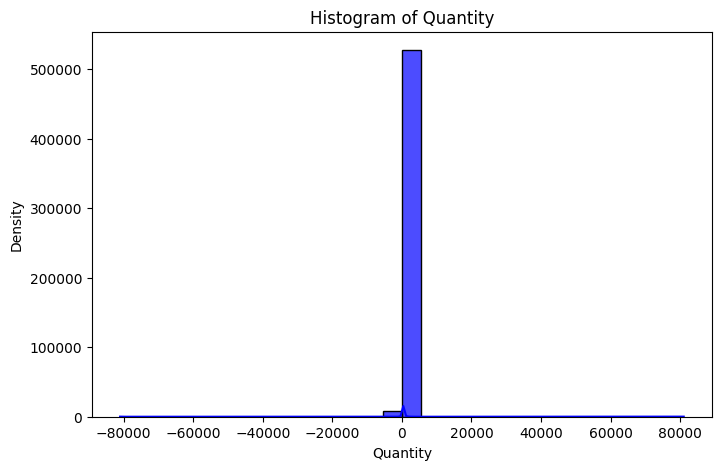

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(churn['Quantity'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.show()

In [37]:
churn[churn['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540451,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom
540452,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [38]:
churn.describe(include='datetime')

,InvoiceDate
count,536592
mean,2011-07-04 17:49:21.773974016
min,2010-12-01 08:26:00
25%,2011-03-28 11:59:00
50%,2011-07-20 12:01:00
75%,2011-10-19 11:52:00
max,2011-12-09 12:50:00


In [39]:
for col in churn.columns:
    if churn[col].dtype == 'object':
        print(f"Column: {col}")
        print(f"Unique values: {churn[col].nunique()}")
        print(f"Missing values: {churn[col].isnull().sum()}")
        print("-" * 50)

Column: InvoiceNo
Unique values: 23249
Missing values: 0
--------------------------------------------------
Column: StockCode
Unique values: 3930
Missing values: 0
--------------------------------------------------
Column: Description
Unique values: 4035
Missing values: 0
--------------------------------------------------
Column: CustomerID
Unique values: 4363
Missing values: 0
--------------------------------------------------
Column: Country
Unique values: 38
Missing values: 0
--------------------------------------------------


In [40]:
churn[churn.duplicated(keep=False, subset=['InvoiceNo', 
                                     'StockCode', 
                                     'Description', 
                                     'Quantity',
                                     'InvoiceDate',
                                     'UnitPrice', 
                                     'CustomerID'])].sort_values(by=['InvoiceNo',
                                                                     'StockCode'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
496,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
519,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
486,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
541,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
491,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
...,...,...,...,...,...,...,...,...
440209,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110,United Kingdom
461456,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838,United Kingdom
461457,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838,United Kingdom
529993,C580764,22667,RECIPE BOX RETROSPOT,-12,2011-12-06 10:38:00,2.95,14562,United Kingdom


In [41]:
churn.sort_values(by=['InvoiceNo', 
                   'StockCode', 
                   'Description', 
                   'Quantity',
                   'InvoiceDate',
                   'UnitPrice', 
                   'CustomerID'],
               inplace=True)

In [42]:
churn.drop_duplicates(subset=['InvoiceNo', 
                          'StockCode', 
                          'Description', 
                          'Quantity',
                          'InvoiceDate',
                          'UnitPrice', 
                          'CustomerID'],
                   keep='first',
                   inplace=True)

In [43]:
churn['LastPurchaseDate'] = churn[churn['Quantity'] > 0].groupby('CustomerID')['InvoiceDate'].transform('max')
churn['TotalPurchase'] = (churn['Quantity'] * churn['UnitPrice']).round(2)

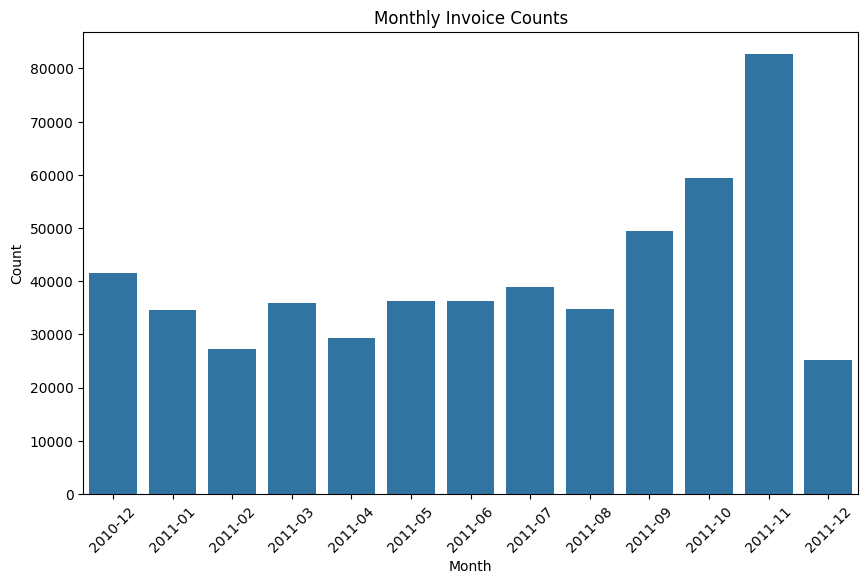

In [44]:
monthly_counts = churn['InvoiceDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=monthly_counts.index.astype(str),
    y=monthly_counts.values
)
plt.title('Monthly Invoice Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show();

In [45]:
churn['Period'] = churn['InvoiceDate'].dt.to_period('Y')
frecuency = churn.groupby(['CustomerID', 'Period'])['InvoiceNo'].nunique().reset_index().pivot_table(index='CustomerID', 
                                                                                                  columns='Period', 
                                                                                                  values='InvoiceNo', 
                                                                                                  fill_value=0)
frecuency.columns = frecuency.columns.astype(str)

In [46]:
churn2 = churn.groupby(['CustomerID', 'Country']).agg({'LastPurchaseDate': 'max',
                                                 'TotalPurchase': ['sum', 'min', 'mean']}).reset_index()
churn2.columns = ['CustomerID', 'Country','LastPurchaseDate', 'TotalPurchase', 'MinPurchase', 'AvgPurchase']

In [47]:
churn2['Recency'] = (churn2['LastPurchaseDate'].max() - churn2['LastPurchaseDate']).dt.days
churn2 = churn2.merge(frecuency, on='CustomerID', how='left')
churn2.rename(columns={'2010': 'Frequency-2010',
                    '2011': 'Frequency-2011'}, 
           inplace=True)

In [48]:
churn2['TotalPurchase'] = churn2['TotalPurchase'].fillna(0).astype(float).round(2)
churn2['MinPurchase'] = churn2['MinPurchase'].fillna(0).astype(float).round(2)
churn2['AvgPurchase'] = churn2['AvgPurchase'].fillna(0).astype(float).round(2)
churn2['Recency'] = churn2['Recency'].fillna(0).astype(int)
churn2['Frequency-2010'] = churn2['Frequency-2010'].fillna(0).astype(int)
churn2['Frequency-2011'] = churn2['Frequency-2011'].fillna(0).astype(int)
churn2.describe(include='number')

,TotalPurchase,MinPurchase,AvgPurchase,Recency,Frequency-2010,Frequency-2011
count,4.379000e+03,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000
mean,2.182806e+03,-69.439315,32.830546,90.849737,0.732816,7.264444
std,2.080969e+04,2817.823728,180.585485,100.038217,7.687944,59.079141
min,-1.192200e+03,-168469.600000,-238.440000,0.000000,0.000000,0.000000
25%,2.925850e+02,-9.950000,11.160000,16.000000,0.000000,1.000000
50%,6.420200e+02,0.850000,16.820000,49.000000,0.000000,2.000000
75%,1.581430e+03,6.960000,23.320000,139.500000,0.000000,5.000000
max,1.266035e+06,3861.000000,9904.880000,373.000000,168.000000,1296.000000


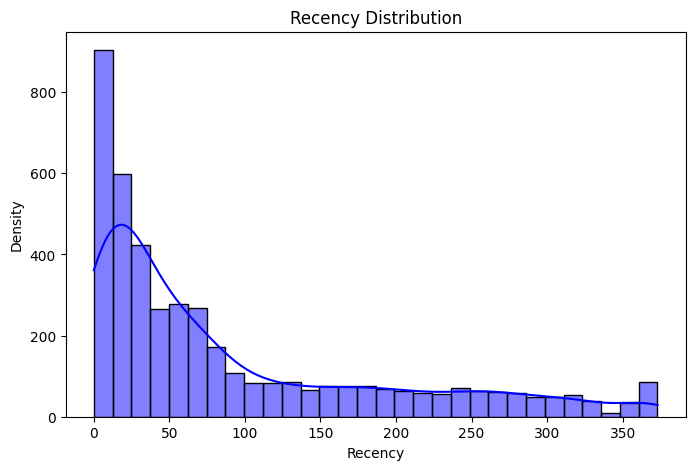

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(churn2['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

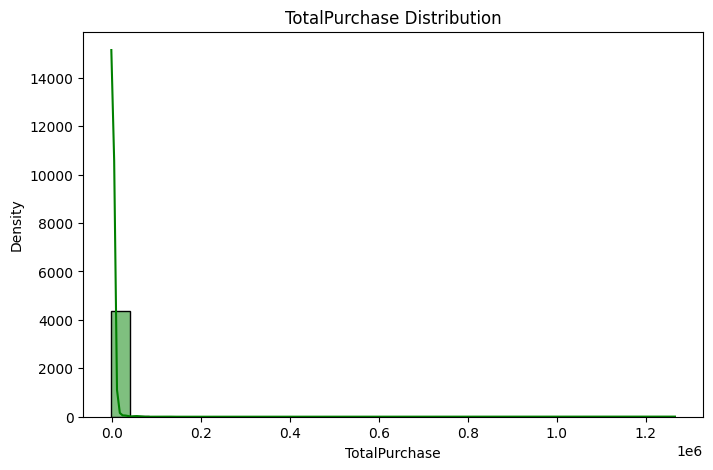

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(churn2['TotalPurchase'], bins=30, kde=True, color='green')
plt.title('TotalPurchase Distribution')
plt.xlabel('TotalPurchase')
plt.ylabel('Density')
plt.show()

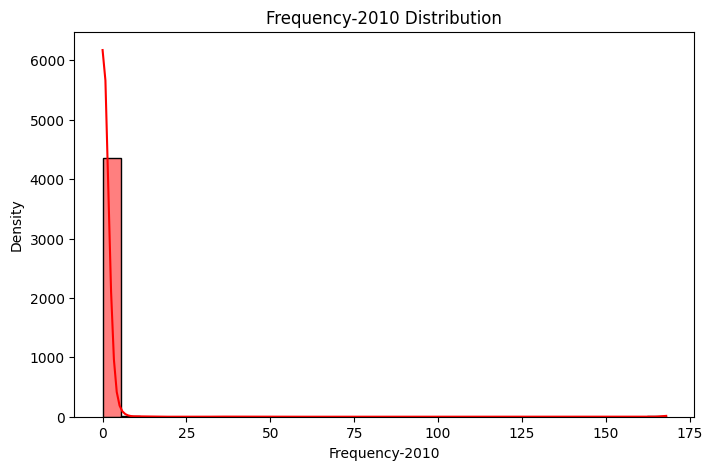

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(churn2['Frequency-2010'], bins=30, kde=True, color='red')
plt.title('Frequency-2010 Distribution')
plt.xlabel('Frequency-2010')
plt.ylabel('Density')
plt.show()

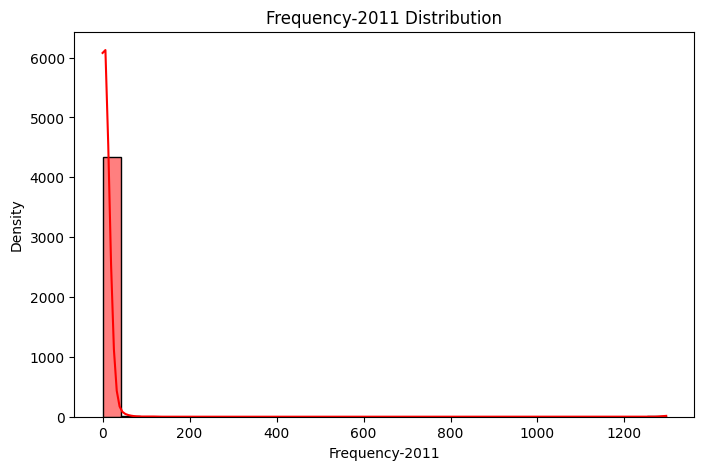

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(churn2['Frequency-2011'], bins=30, kde=True, color='red')
plt.title('Frequency-2011 Distribution')
plt.xlabel('Frequency-2011')
plt.ylabel('Density')
plt.show()